In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from requests import get
from bs4 import BeautifulSoup
import csv
import pandas as pd
from datetime import datetime
import seaborn as sns
import re
from tqdm import tqdm

In [2]:
url = "https://www.estesparkweather.net/archive_reports.php?date=202208"

In [3]:
r = requests.get(url)

In [4]:
soup = BeautifulSoup(r.text,'html.parser')

In [5]:
tables = soup.find_all('table')

In [6]:
tables

[<table border="0" cellpadding="3" cellspacing="0">
 <tr class="table-top">
 <td colspan="2">Aug 1 Average and Extremes</td>
 </tr>
 <tr class="column-light">
 <td>Average temperature</td><td> 64.8�F</td>
 </tr>
 <tr class="column-dark">
 <td>Average humidity</td><td> 62%</td>
 </tr>
 <tr class="column-light">
 <td>Average dewpoint</td><td> 49.3�F</td>
 </tr>
 <tr class="column-dark">
 <td>Average barometer</td><td> 29.7 in.</td>
 </tr>
 <tr class="column-light">
 <td>Average windspeed</td><td> 3.5 mph</td>
 </tr>
 <tr class="column-dark">
 <td>Average gustspeed</td><td> 5.6 mph</td>
 </tr>
 <tr class="column-light">
 <td>Average direction</td><td> 279� ( W )</td>
 </tr>
 <tr class="column-dark">
 <td>Rainfall for month</td><td> 0.00 in.</td>
 </tr>
 <tr class="column-light">
 <td>Rainfall for year</td><td> 7.64 in.</td>
 </tr>
 <tr class="column-dark">
 <td>Maximum rain per minute</td><td> 0.00 in. on day 01 at time 00:00</td>
 </tr>
 <tr class="column-light">
 <td>Maximum temperature

In [7]:
parsed_data = [row.text.splitlines() for row in tables]
parsed_data = parsed_data[:31] 

In [8]:
parsed_data

[['',
  '',
  'Aug 1 Average and Extremes',
  '',
  '',
  'Average temperature 64.8�F',
  '',
  '',
  'Average humidity 62%',
  '',
  '',
  'Average dewpoint 49.3�F',
  '',
  '',
  'Average barometer 29.7 in.',
  '',
  '',
  'Average windspeed 3.5 mph',
  '',
  '',
  'Average gustspeed 5.6 mph',
  '',
  '',
  'Average direction 279� ( W )',
  '',
  '',
  'Rainfall for month 0.00 in.',
  '',
  '',
  'Rainfall for year 7.64 in.',
  '',
  '',
  'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
  '',
  '',
  'Maximum temperature 82.7�F on day 01 at time 13:01',
  '',
  '',
  'Minimum temperature 48.7�F on day 01 at time 04:13',
  '',
  '',
  'Maximum humidity 87% on day 01 at time 16:52',
  '',
  '',
  'Minimum humidity 25% on day 01 at time 13:01',
  '',
  '',
  'Maximum pressure 29.819 in. on day 01 at time 01:52',
  '',
  '',
  'Minimum pressure 29.665 in. on day 01 at time 23:58',
  '',
  '',
  'Maximum windspeed 15.0 mph on day 01 at time 13:26',
  '',
  '',
  'Maximum gust 

In [9]:
for l in range(len(parsed_data)):
  parsed_data[l] = parsed_data[l][2:len(parsed_data[l]):3]

parsed_data

[['Aug 1 Average and Extremes',
  'Average temperature 64.8�F',
  'Average humidity 62%',
  'Average dewpoint 49.3�F',
  'Average barometer 29.7 in.',
  'Average windspeed 3.5 mph',
  'Average gustspeed 5.6 mph',
  'Average direction 279� ( W )',
  'Rainfall for month 0.00 in.',
  'Rainfall for year 7.64 in.',
  'Maximum rain per minute 0.00 in. on day 01 at time 00:00',
  'Maximum temperature 82.7�F on day 01 at time 13:01',
  'Minimum temperature 48.7�F on day 01 at time 04:13',
  'Maximum humidity 87% on day 01 at time 16:52',
  'Minimum humidity 25% on day 01 at time 13:01',
  'Maximum pressure 29.819 in. on day 01 at time 01:52',
  'Minimum pressure 29.665 in. on day 01 at time 23:58',
  'Maximum windspeed 15.0 mph on day 01 at time 13:26',
  'Maximum gust speed 21.9 mph  from 028 �(NNE) on day 01 at time 14:57',
  'Maximum heat index 81.2�F on day 01 at time 13:05'],
 ['Aug 2 Average and Extremes',
  'Average temperature 67.4�F',
  'Average humidity 52%',
  'Average dewpoint 48.6

In [10]:
data = []
for day in parsed_data:
    d = {}
    avg_humidity = float(day[2].split(sep=' ')[2].split(sep='%')[0])
    avg_windspeed = float(day[5].split(sep=' ')[2])
    rainfall = float(day[8].split(sep=' ')[3])
    max_temperature = day[3].split(sep=' ')[2]
    min_temperature = day[12].split(sep = ' ')[2]
    max_temperature = float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", max_temperature)[0])
    min_temperature = float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", min_temperature)[0])
    min_humidity = float(day[4].split(sep=' ')[2].split(sep='%')[0])
    max_windspeed = float(day[5].split(sep=' ')[2])


    d['humidity'] = avg_humidity
    d['windspeed'] = avg_windspeed
    d['rainfall']=rainfall
    d['max_temperature']=max_temperature
    d['min_humidity']=min_humidity
    d['max_windspeed']=max_windspeed
    d['min_temperature'] = min_temperature
    data.append(d)
data

[{'humidity': 62.0,
  'windspeed': 3.5,
  'rainfall': 0.0,
  'max_temperature': 49.3,
  'min_humidity': 29.7,
  'max_windspeed': 3.5,
  'min_temperature': 48.7},
 {'humidity': 52.0,
  'windspeed': 5.7,
  'rainfall': 0.0,
  'max_temperature': 48.6,
  'min_humidity': 29.6,
  'max_windspeed': 5.7,
  'min_temperature': 55.3},
 {'humidity': 63.0,
  'windspeed': 2.9,
  'rainfall': 0.0,
  'max_temperature': 51.2,
  'min_humidity': 29.7,
  'max_windspeed': 2.9,
  'min_temperature': 52.8},
 {'humidity': 59.0,
  'windspeed': 1.6,
  'rainfall': 0.0,
  'max_temperature': 48.4,
  'min_humidity': 29.7,
  'max_windspeed': 1.6,
  'min_temperature': 47.1},
 {'humidity': 56.0,
  'windspeed': 3.6,
  'rainfall': 0.0,
  'max_temperature': 49.0,
  'min_humidity': 29.6,
  'max_windspeed': 3.6,
  'min_temperature': 49.9},
 {'humidity': 55.0,
  'windspeed': 3.5,
  'rainfall': 0.0,
  'max_temperature': 50.5,
  'min_humidity': 29.6,
  'max_windspeed': 3.5,
  'min_temperature': 54.8},
 {'humidity': 70.0,
  'winds

In [19]:
df = pd.DataFrame(data)
df.to_csv('weather.csv')
df

,humidity,windspeed,rainfall,max_temperature,min_humidity,max_windspeed,min_temperature
0,62.0,3.5,0.00,49.3,29.7,3.5,48.7
1,52.0,5.7,0.00,48.6,29.6,5.7,55.3
2,63.0,2.9,0.00,51.2,29.7,2.9,52.8
3,59.0,1.6,0.00,48.4,29.7,1.6,47.1
4,56.0,3.6,0.00,49.0,29.6,3.6,49.9
5,55.0,3.5,0.00,50.5,29.6,3.5,54.8
6,70.0,3.9,0.00,51.4,29.8,3.9,48.5
7,62.0,2.4,0.00,48.5,29.8,2.4,46.5
8,49.0,2.1,0.00,43.6,29.8,2.1,45.7
9,47.0,1.9,0.00,42.8,29.9,1.9,47.1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   humidity         31 non-null     float64
 1   windspeed        31 non-null     float64
 2   rainfall         31 non-null     float64
 3   max_temperature  31 non-null     float64
 4   min_humidity     31 non-null     float64
 5   max_windspeed    31 non-null     float64
 6   min_temperature  31 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


In [13]:
df.describe()

,humidity,windspeed,rainfall,max_temperature,min_humidity,max_windspeed,min_temperature
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,61.935484,2.561290,0.033226,46.861290,29.783871,2.561290,47.616129
std,12.301587,1.349982,0.027975,3.930706,0.112833,1.349982,4.526816
min,37.000000,0.900000,0.000000,38.900000,29.500000,0.900000,40.700000
25%,51.500000,1.600000,0.000000,44.000000,29.700000,1.600000,43.850000
50%,62.000000,2.300000,0.050000,47.300000,29.800000,2.300000,47.100000
75%,70.500000,2.850000,0.060000,49.400000,29.900000,2.850000,50.650000
max,85.000000,6.300000,0.060000,53.300000,29.900000,6.300000,58.100000


Text(0, 0.5, 'Humidity')

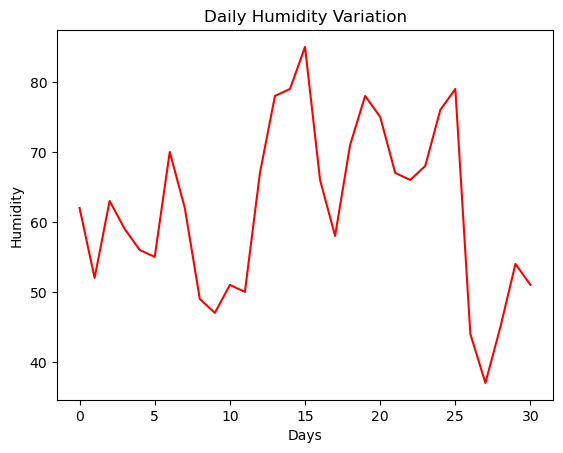

In [14]:
plt.plot(df.index,df['humidity'],color = 'red')
plt.title('Daily Humidity Variation')
plt.xlabel('Days')
plt.ylabel('Humidity')

Text(0, 0.5, 'max_temperature')

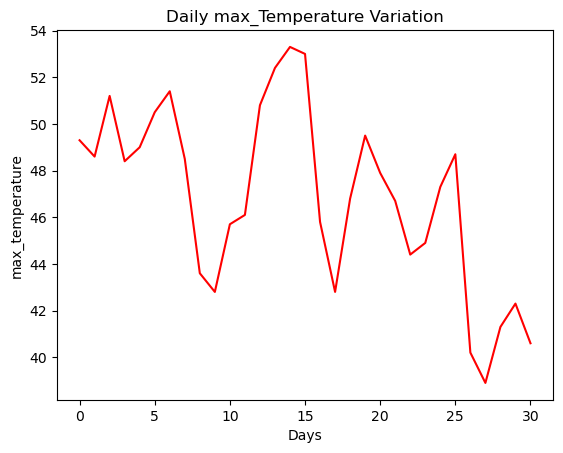

In [15]:
plt.plot(df.index,df['max_temperature'],color = 'red')
plt.title('Daily max_Temperature Variation')
plt.xlabel('Days')
plt.ylabel('max_temperature')

Text(0, 0.5, 'min_temperature')

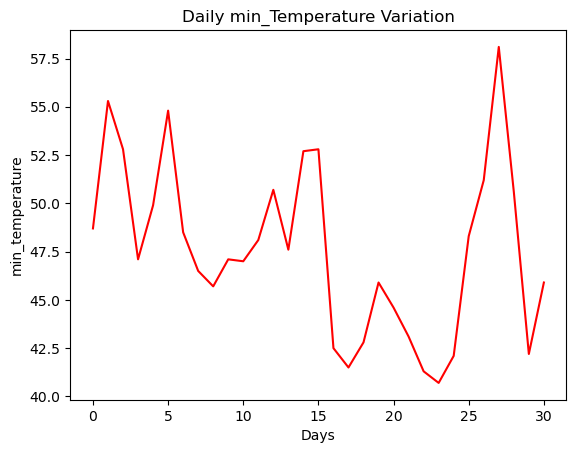

In [16]:
plt.plot(df.index,df['min_temperature'],color = 'red')
plt.title('Daily min_Temperature Variation')
plt.xlabel('Days')
plt.ylabel('min_temperature')

Text(0, 0.5, 'Temperature')

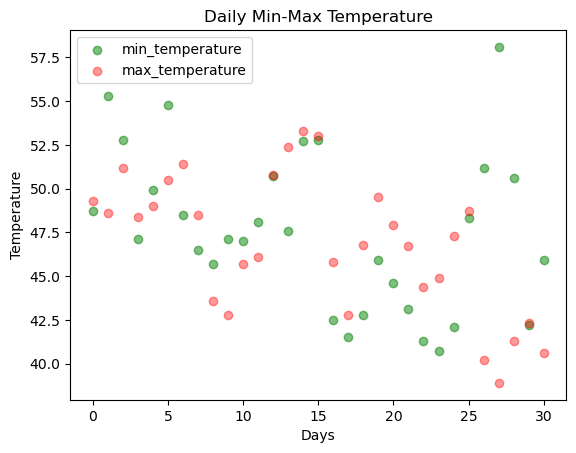

In [17]:
from cProfile import label


plt.scatter(df.index,df['min_temperature'],alpha = 0.5,c = 'g',label='min_temperature')
plt.scatter(df.index,df['max_temperature'],alpha = 0.4,c = 'r',label='max_temperature')
plt.legend()
plt.title('Daily Min-Max Temperature')
plt.xlabel('Days')
plt.ylabel('Temperature')

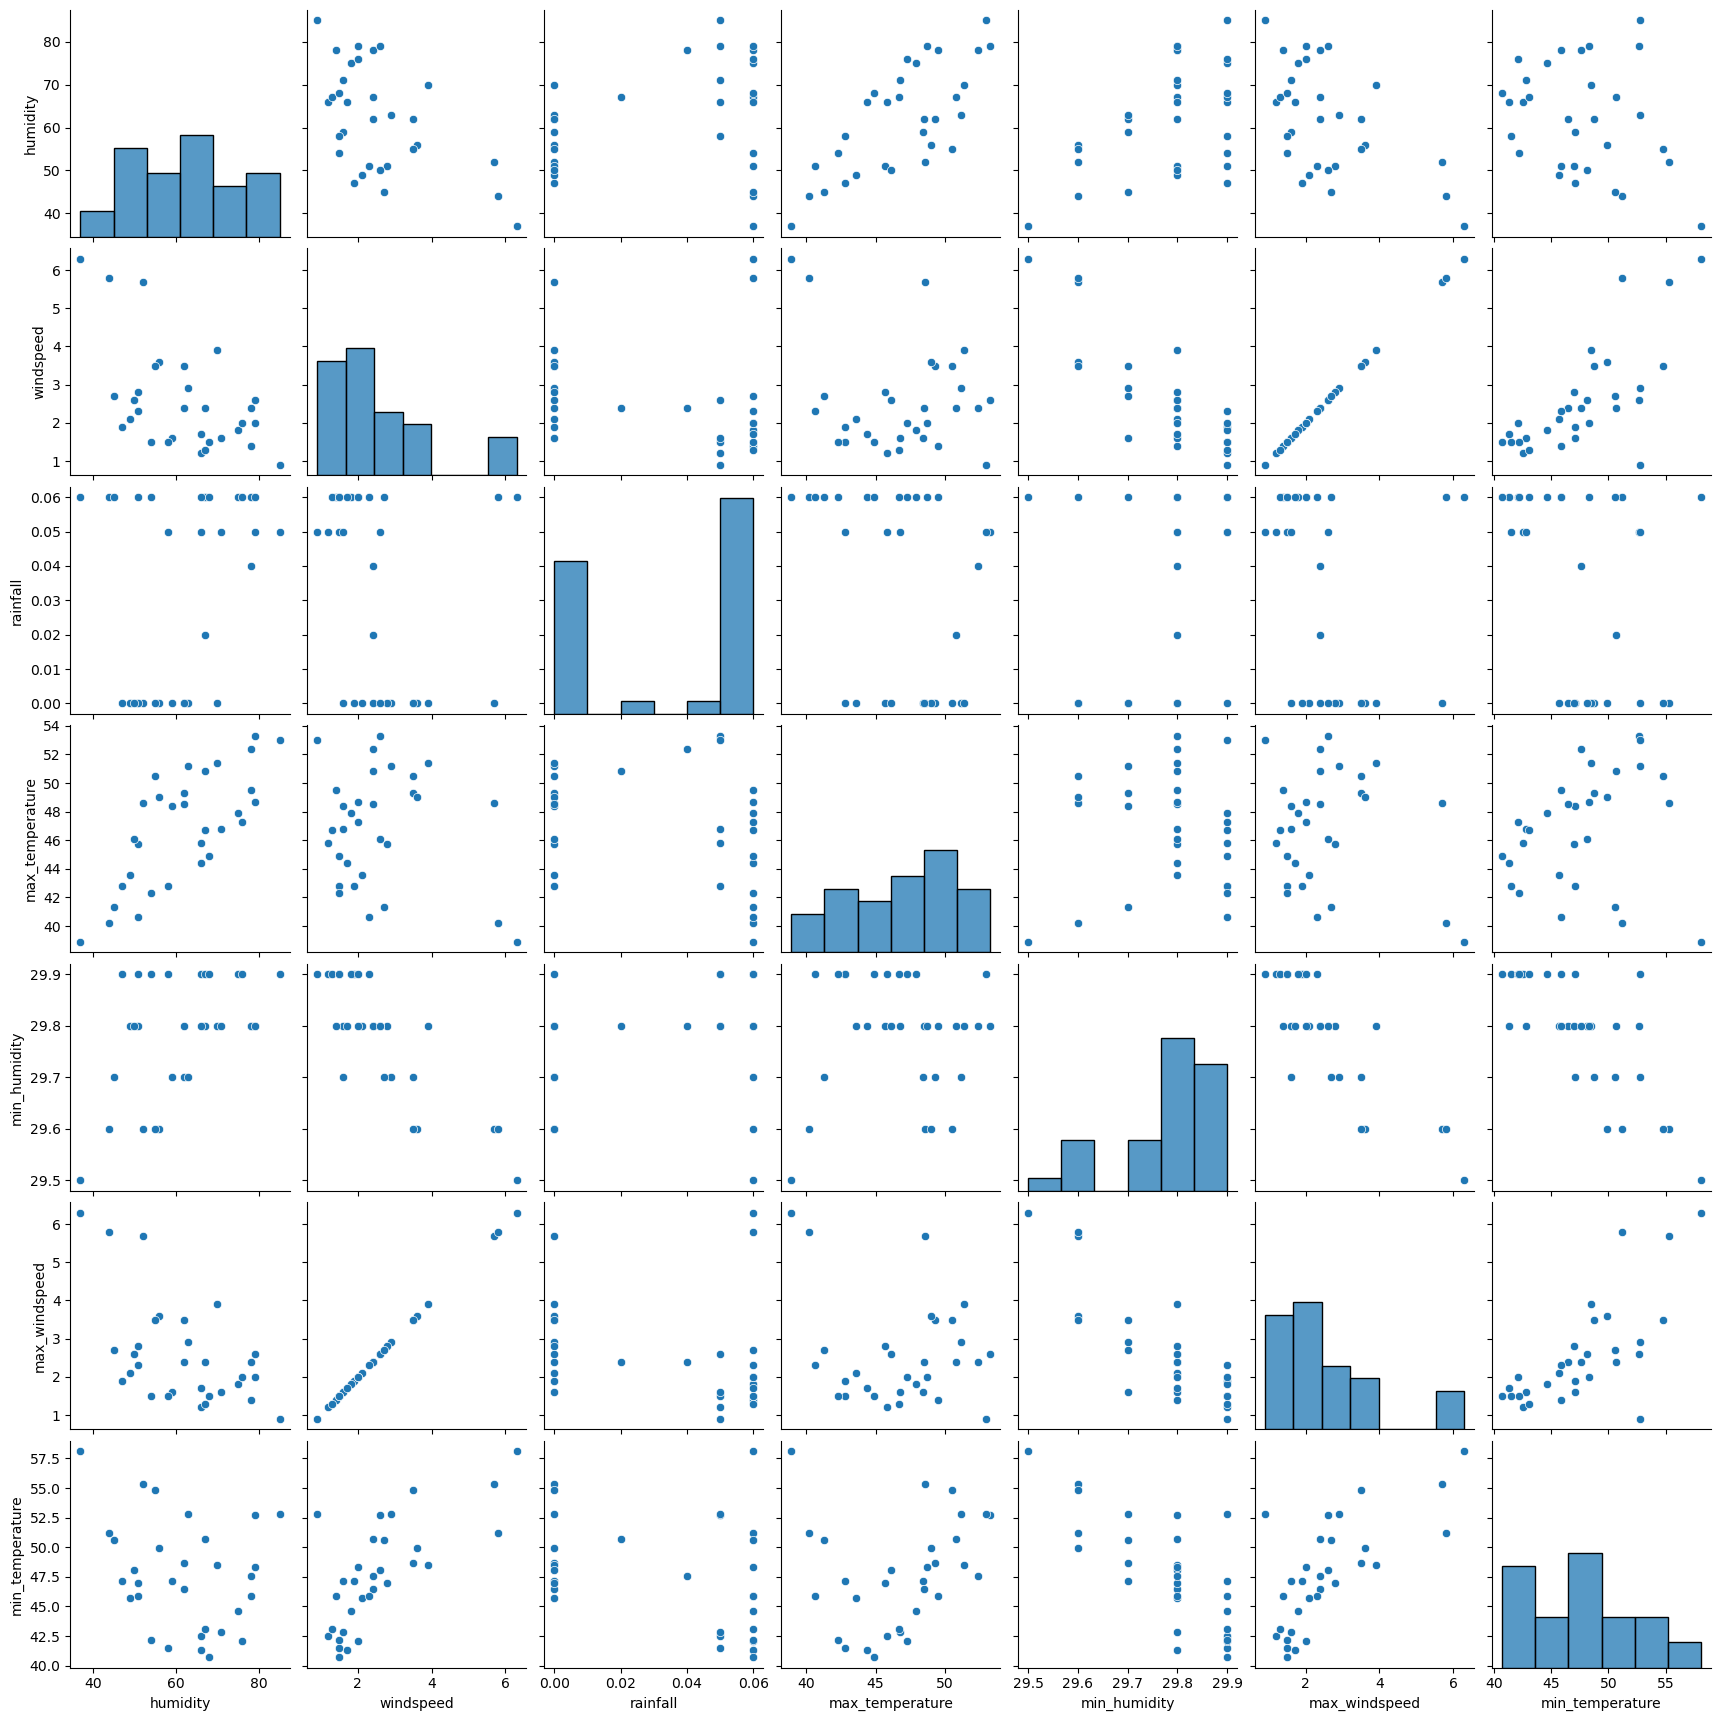

In [18]:
sns.pairplot(df)
plt.savefig('pairplot.png')